__6. Using the data from Question 3, write code to analyze the data and answer the following questions__

__Note__ 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

__Insights to be drawn -__
* Get all Pokemons whose spawn rate is less than 5%
* Get all Pokemons that have less than 4 weaknesses
* Get all Pokemons that have no multipliers at all
* Get all Pokemons that do not have more than 2 evolutions
* Get all Pokemons whose spawn time is less than 300 seconds.

__Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.__
* Get all Pokemon who have more than two types of capabilities

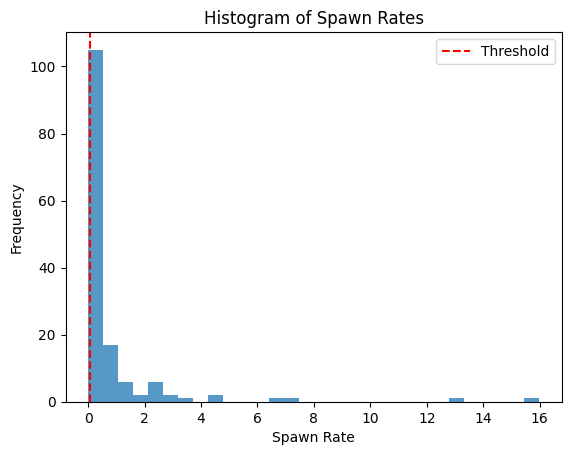

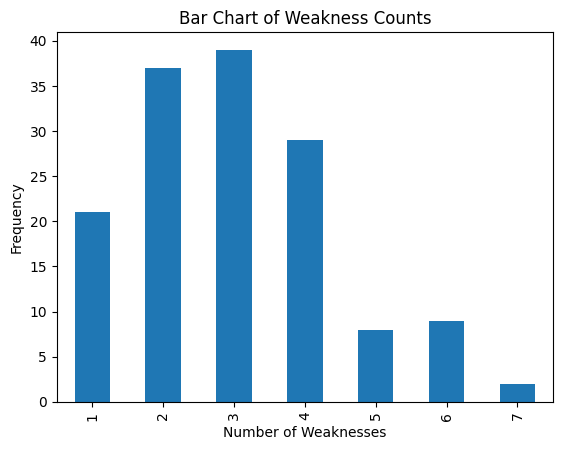

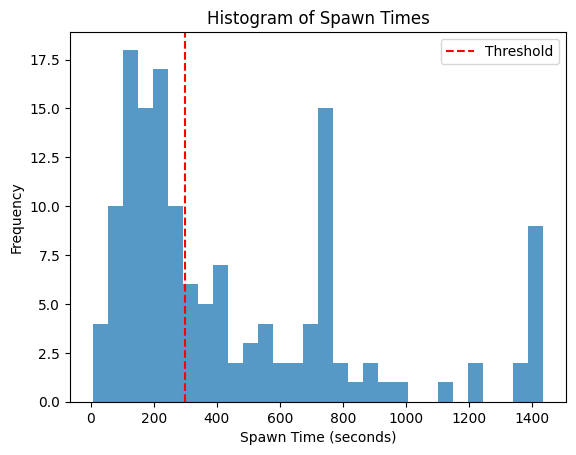

Pokemons with spawn rate less than 5%:
1         Ivysaur
2        Venusaur
4      Charmeleon
5       Charizard
7       Wartortle
8       Blastoise
11     Butterfree
25         Raichu
27      Sandslash
30      Nidoqueen
33       Nidoking
35       Clefable
37      Ninetales
39     Wigglytuff
44      Vileplume
50        Dugtrio
52        Persian
56       Primeape
58       Arcanine
61      Poliwrath
63        Kadabra
64       Alakazam
66        Machoke
67        Machamp
70     Victreebel
75          Golem
77       Rapidash
79        Slowbro
81       Magneton
82     Farfetch'd
86        Dewgong
88            Muk
90       Cloyster
93         Gengar
100     Electrode
102     Exeggutor
104       Marowak
105     Hitmonlee
106    Hitmonchan
107     Lickitung
109       Weezing
111        Rhydon
112       Chansey
114    Kangaskhan
116        Seadra
120       Starmie
121      Mr. Mime
129      Gyarados
130        Lapras
133      Vaporeon
134       Jolteon
135       Flareon
136       Porygon
138    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Fetch the data from the provided URL
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)
data = response.json()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data['pokemon'])

# Filter out rows with invalid 'spawn_time' values
df = df[df['spawn_time'] != 'N/A']

# Convert 'spawn_time' column to seconds for easier analysis
df['spawn_time'] = pd.to_datetime(df['spawn_time'], format='%M:%S', errors='coerce').dt.minute * 60 + pd.to_datetime(df['spawn_time'], format='%M:%S', errors='coerce').dt.second

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 0.05
low_spawn_rate_pokemons = df[df['spawn_chance'] < spawn_rate_threshold]

# Plotting the histogram of spawn rates for better visualization
plt.hist(df['spawn_chance'], bins=30, alpha=0.75)
plt.axvline(x=spawn_rate_threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Spawn Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Spawn Rates')
plt.legend()
plt.show()

# Get all Pokemons that have less than 4 weaknesses
weakness_threshold = 4
few_weakness_pokemons = df[df['weaknesses'].apply(lambda x: len(x)) < weakness_threshold]

# Plotting the bar chart of the number of weaknesses for better visualization
weakness_counts = df['weaknesses'].apply(lambda x: len(x))
weakness_counts.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Frequency')
plt.title('Bar Chart of Weakness Counts')
plt.show()

# Get all Pokemons that have no multipliers at all
no_multiplier_pokemons = df[df['multipliers'].apply(lambda x: len(x) if isinstance(x, list) else 0) == 0]

# Get all Pokemons that do not have more than 2 evolutions
evolution_threshold = 2
few_evolutions_pokemons = df[df['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0) <= evolution_threshold]

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_threshold = 300
low_spawn_time_pokemons = df[df['spawn_time'] < spawn_time_threshold]

# Plotting the histogram of spawn times for better visualization
plt.hist(df['spawn_time'], bins=30, alpha=0.75)
plt.axvline(x=spawn_time_threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Spawn Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Spawn Times')
plt.legend()
plt.show()

# Get all Pokemon who have more than two types of capabilities
capability_threshold = 2
multiple_capabilities_pokemons = df[df['type'].apply(lambda x: len(x)) > capability_threshold]

# Print the results
print("Pokemons with spawn rate less than 5%:")
print(low_spawn_rate_pokemons['name'])
print()

print("Pokemons with less than 4 weaknesses:")
print(few_weakness_pokemons['name'])
print()

print("Pokemons with no multipliers at all:")
print(no_multiplier_pokemons['name'])
print()

print("Pokemons with not more than 2 evolutions:")
print(few_evolutions_pokemons['name'])
print()

print("Pokemons with spawn time less than 300 seconds:")
print(low_spawn_time_pokemons['name'])
print()

print("Pokemons with more than two types of capabilities:")
print(multiple_capabilities_pokemons['name'])
